In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# 데이터 준비
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes['data']
y = diabetes['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
# 선형회귀모델 훈련(학습)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.5190341891679049, 0.4849058889476757)

In [4]:
# 값 예측 + 오차 평가

test_predicted = lr.predict(X_test)
print( test_predicted[:5] )
mean_absolute_error(y_test, test_predicted), \
mean_squared_error(y_test, test_predicted), \
np.sqrt(mean_squared_error(y_test, test_predicted))

[137.94908878 182.533354   129.85295373 292.5630923  124.86788221]


(41.54850685988059, 2848.3106508475043, 53.36956671032195)

In [5]:
# 선형 회귀 모델의 각 속성 가중치 + 편향 값
lr.coef_, lr.intercept_

(array([  47.74968054, -241.99090728,  531.97106288,  381.56286182,
        -918.50290455,  508.25778252,  116.95016447,  269.4923028 ,
         695.80811712,   26.32458203]),
 151.6651755919933)

In [6]:
# 릿지모델 훈련(학습)

from sklearn.linear_model import Ridge

scores = []
weights = []
for a in [10, 1, 0.1, 0.01, 0.001]:
    ridge = Ridge(alpha=a)

    ridge.fit(X_train, y_train)
    scores.append((a, ridge.score(X_train, y_train), ridge.score(X_test, y_test)))
    weights.append((a, ridge.coef_))

In [7]:
scores

[(10, 0.15081869635450984, 0.1564233282092311),
 (1, 0.42730211000433205, 0.43840029731424457),
 (0.1, 0.5113994079407003, 0.4918270736855387),
 (0.01, 0.5172936105412855, 0.48705852506054115),
 (0.001, 0.5189585589174219, 0.4854389961024681)]

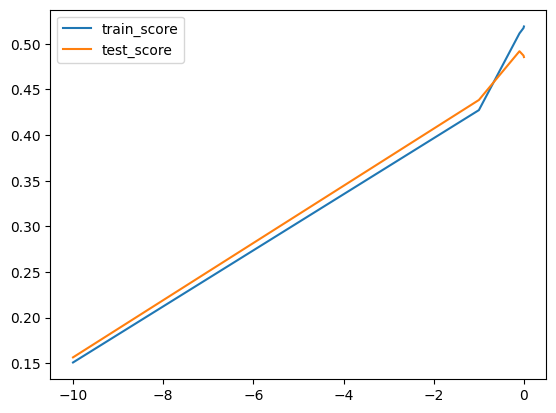

In [8]:
scores_df = pd.DataFrame(scores, columns=["alpha", "train_score", "test_score"])

plt.plot(-scores_df["alpha"], scores_df['train_score'], label="train_score")
plt.plot(-scores_df["alpha"], scores_df['test_score'], label='test_score')
plt.legend()
plt.show()

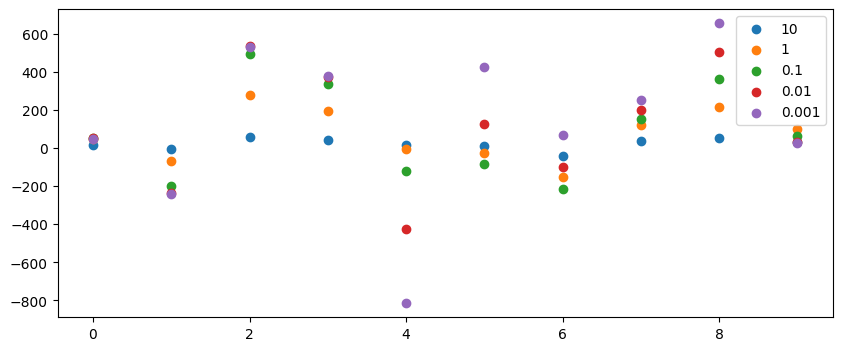

In [9]:
plt.figure(figsize=(10, 4))
for alpha, weight in weights:
    plt.scatter(np.arange(len(weight)), weight, label=str(alpha))
plt.legend()
plt.show()

In [10]:
# 라소모델 훈련(학습)

from sklearn.linear_model import Lasso

scores = []
weights = []
for a in [10, 1, 0.1, 0.01, 0.001]:
    lasso = Lasso(alpha=a)

    lasso.fit(X_train, y_train)
    scores.append((a, lasso.score(X_train, y_train), lasso.score(X_test, y_test)))
    weights.append((a, lasso.coef_))

In [11]:
scores

[(10, 0.0, -0.014016723490579253),
 (1, 0.34687336241711, 0.3791413953419158),
 (0.1, 0.507826468555518, 0.5019753487835406),
 (0.01, 0.5176658929445211, 0.4880363435126295),
 (0.001, 0.5190041207412235, 0.4853215083060125)]

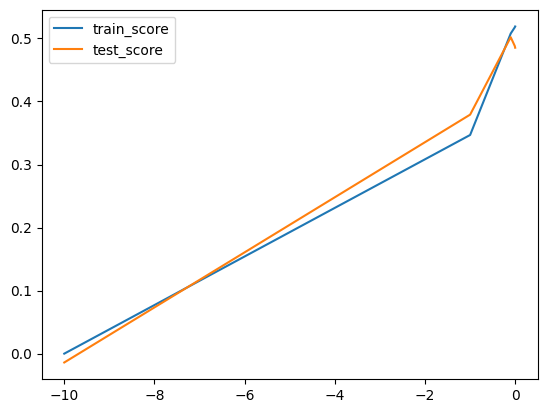

In [12]:
scores_df = pd.DataFrame(scores, columns=["alpha", "train_score", "test_score"])

plt.plot(-scores_df["alpha"], scores_df['train_score'], label="train_score")
plt.plot(-scores_df["alpha"], scores_df['test_score'], label='test_score')
plt.legend()
plt.show()

[ True  True  True  True  True  True  True  True  True  True]
[ True  True False False  True  True  True  True False  True]
[ True False False False False  True False  True False False]
[False False False False False False False False False False]
[False False False False False False False False False False]


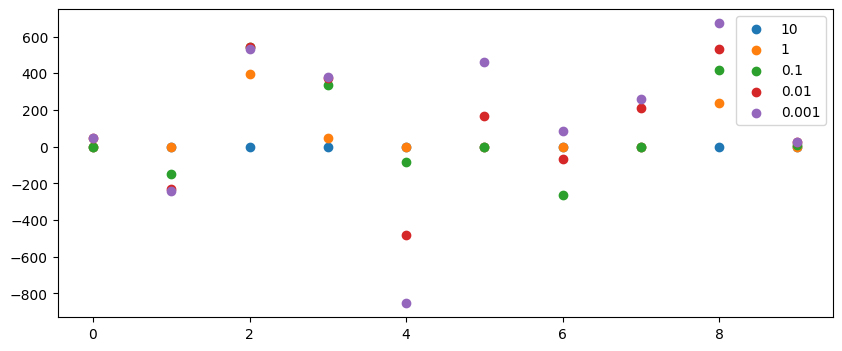

In [13]:
plt.figure(figsize=(10, 4))
for alpha, weight in weights:
    print(weight == 0)
    plt.scatter(np.arange(len(weight)), weight, label=str(alpha))
plt.legend()
plt.show()

In [15]:
# SGDRegressor 모델 훈련

from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=1000000)
sgdr.fit(X_train, y_train)

sgdr.score(X_train, y_train), sgdr.score(X_test, y_test)

(0.49575917860302976, 0.4890642818890638)